In [45]:
import uproot
import awkward as ak

In [46]:
import vector

In [47]:
import time

In [48]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

In [49]:
import infofile

In [50]:
lumi = 10
fraction = 1.0

In [51]:
#tuple_path = "https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/4lep/"
tuple_path = "./4lep/"

In [52]:
samples = {
    'data': {
        'list' : ['data_A', 'data_B', 'data_C', 'data_D'],
    },
    
    r'Background $Z,t\bar{t}$' : { 
        'list' : ['Zee', 'Zmumu', 'ttbar_lep'],
        'color' : "#6b59d3"
    },
    
    r'Background $ZZ^*$' : {
        'list' : ['llll'],
        'color' : "#00cdff"
    },
    
    r'Signal ($m_H$ = 125 GeV)' : {
        'list' : ['ggH125_ZZ4lep','VBFH125_ZZ4lep','WH125_ZZ4lep', 'ZH125_ZZ4lep'],
        'color' : "#ff0000"
    },
    
}

In [53]:
MeV = 0.001
GeV = 1.0

In [54]:
def get_data_from_files():
    data = {}
    for s in samples:
        print('Processing'+s+'samples')
        frames = []
        for val in samples[s]['list']:
            if s == 'data': prefix = "Data/"
            else:
                prefix = "MC/mc_"+str(infofile.infos[val]["DSID"])+"."
            fileString = tuple_path+prefix+val+".4lep.root"
            temp = read_file(fileString,val)
            frames.append(temp)
        data[s] = ak.concatenate(frames)
        
    return data

In [55]:
def calc_weight(xsec_weight, events):
    return(
        xsec_weight
        * events.mcWeight
        * events.scaleFactor_PILEUP
        * events.scaleFactor_ELE
        * events.scaleFactor_MUON
        * events.scaleFactor_LepTRIGGER
    )

In [56]:
def get_xsec_weight(sample):
    info = infofile.infos[sample]
    xsec_weight = (lumi*1000*info["xsec"])/(info["sumw"]*info["red_eff"])
    return xsec_weight

In [57]:
def calc_eta0(lep_eta):
    #p4 = vector.awk(ak.zip(dict(pt=lep_pt, eta=lep_eta, phi=lep_phi, E=lep_E)))
    eta_0 = lep_eta[:,0]
    return eta_0

In [58]:
def calc_eta1(lep_eta):
    #p4 = vector.awk(ak.zip(dict(pt=lep_pt, eta=lep_eta, phi=lep_phi, E=lep_E)))
    eta_1 = lep_eta[:,1]
    return eta_1

In [59]:
def calc_eta2(lep_eta):
    #p4 = vector.awk(ak.zip(dict(pt=lep_pt, eta=lep_eta, phi=lep_phi, E=lep_E)))
    eta_2 = lep_eta[:,2]
    return eta_2

In [60]:
def calc_eta3(lep_eta):
    #p4 = vector.awk(ak.zip(dict(pt=lep_pt, eta=lep_eta, phi=lep_phi, E=lep_E)))
    eta_3 = lep_eta[:,3]
    return eta_3

In [61]:
def cut_lep_charge(lep_charge):
    return lep_charge[:,0] + lep_charge[:,1] + lep_charge[:,2] + lep_charge[:,3] != 0

In [62]:
def cut_lep_type(lep_type):
    sum_lep_type = lep_type[:,0] + lep_type[:,1] + lep_type[:,2] + lep_type[:,3]
    return (sum_lep_type != 44) & (sum_lep_type != 48) & (sum_lep_type != 52)

In [63]:
def read_file(path,sample):
    start = time.time()
    print("\tProcessing: "+sample)
    data_all = []
    
    with uproot.open(path + ":mini") as tree:
        numevents = tree.num_entries
        if 'data' not in sample: xsec_weight = get_xsec_weight(sample)
        for data in tree.iterate(['lep_eta','lep_charge', 'lep_phi', 'lep_E', 'lep_type',
                                  'mcWeight','scaleFactor_PILEUP',
                                  'scaleFactor_ELE','scaleFactor_MUON',
                                  'scaleFactor_LepTRIGGER'],
                                 library="ak",
                                 entry_stop=numevents*fraction):
            nIn = len(data)
            
            if 'data' not in sample:
                data['totalWeight'] = calc_weight(xsec_weight, data)
            
            data = data[~cut_lep_charge(data.lep_charge)]
            
            data = data[~cut_lep_type(data.lep_type)]
            
            data['eta0'] = calc_eta0(data.lep_eta)
            
            data['eta1'] = calc_eta1(data.lep_eta)
            
            data['eta2'] = calc_eta2(data.lep_eta)
            
            data['eta3'] = calc_eta3(data.lep_eta)
            
            nOut = len(data)
            data_all.append(data)
            elapsed = time.time() - start
            print("\t\t nIn: "+str(nIn)+",\t nOut: \t"+str(nOut)+"\t in "+str(round(elapsed,1))+"s")
            
        return ak.concatenate(data_all)

In [64]:
start = time.time()
data = get_data_from_files()
elapsed = time.time() - start
print("Time taken: "+str(round(elapsed,1))+"s")

Processingdatasamples
	Processing: data_A
		 nIn: 1,	 nOut: 	0	 in 0.2s
		 nIn: 1,	 nOut: 	1	 in 0.3s
		 nIn: 1,	 nOut: 	1	 in 0.3s
		 nIn: 1,	 nOut: 	0	 in 0.3s
		 nIn: 1,	 nOut: 	1	 in 0.4s
		 nIn: 1,	 nOut: 	1	 in 0.4s
		 nIn: 1,	 nOut: 	0	 in 0.4s
		 nIn: 1,	 nOut: 	1	 in 0.4s
		 nIn: 1,	 nOut: 	1	 in 0.4s
		 nIn: 1,	 nOut: 	1	 in 0.5s
		 nIn: 1,	 nOut: 	0	 in 0.5s
		 nIn: 1,	 nOut: 	0	 in 0.5s
		 nIn: 1,	 nOut: 	0	 in 0.5s
		 nIn: 1,	 nOut: 	0	 in 0.5s
		 nIn: 1,	 nOut: 	1	 in 0.6s
		 nIn: 1,	 nOut: 	1	 in 0.6s
		 nIn: 1,	 nOut: 	1	 in 0.6s
		 nIn: 1,	 nOut: 	1	 in 0.7s
		 nIn: 1,	 nOut: 	1	 in 0.7s
		 nIn: 1,	 nOut: 	1	 in 0.7s
		 nIn: 1,	 nOut: 	1	 in 0.7s
		 nIn: 1,	 nOut: 	1	 in 0.8s
		 nIn: 1,	 nOut: 	1	 in 0.8s
		 nIn: 1,	 nOut: 	1	 in 0.8s
		 nIn: 1,	 nOut: 	1	 in 0.8s
		 nIn: 1,	 nOut: 	1	 in 0.9s
		 nIn: 1,	 nOut: 	0	 in 0.9s
		 nIn: 1,	 nOut: 	1	 in 0.9s
		 nIn: 1,	 nOut: 	0	 in 0.9s
		 nIn: 1,	 nOut: 	1	 in 0.9s
		 nIn: 1,	 nOut: 	1	 in 1.0s
		 nIn: 1,	 nOut: 	0	 in 1.0

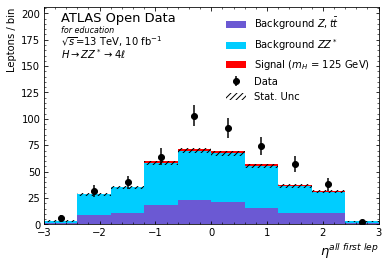

In [65]:

    
xmin = -3
xmax = 3
step_size = 0.6
    
bin_edges = np.arange(start=xmin, stop=xmax+step_size, step=step_size)
    
bin_centres = np.arange(start=xmin+step_size/2, stop=xmax+step_size/2, step=step_size)

#data

data_x0,_ = np.histogram(ak.to_numpy(data['data']['eta0']), bins=bin_edges)
#data_x1,_ = np.histogram(ak.to_numpy(data['data']['eta1']), bins=bin_edges)
#data_x2,_ = np.histogram(ak.to_numpy(data['data']['eta2']), bins=bin_edges)
#data_x3,_ = np.histogram(ak.to_numpy(data['data']['eta3']), bins=bin_edges)

data_x0_errors = np.sqrt(data_x0)
#data_x1_errors = np.sqrt(data_x1)
#data_x2_errors = np.sqrt(data_x2)
#data_x3_errors = np.sqrt(data_x3)

#signal

signal_x = ak.to_numpy(data[r'Signal ($m_H$ = 125 GeV)']['eta0'])
#signal_x1 = ak.to_numpy(data[r'Signal ($m_H$ = 125 GeV)']['eta1'])
#signal_x2 = ak.to_numpy(data[r'Signal ($m_H$ = 125 GeV)']['eta2'])
#signal_x3 = ak.to_numpy(data[r'Signal ($m_H$ = 125 GeV)']['eta3'])

signal_weights = ak.to_numpy(data[r'Signal ($m_H$ = 125 GeV)'].totalWeight)
signal_color = samples[r'Signal ($m_H$ = 125 GeV)']['color']

#background
mc_x0 = []
#mc_x1 = []
#mc_x2 = []
#mc_x3 = []

mc_weights = []
#mc_weights1 = []
#mc_Weights2 = []
#mc_weights3 = []
mc_colors = []
mc_labels = []

#background Ztt, ZZ
for s in samples:
    if s not in ['data', r'Signal ($m_H$ = 125 GeV)']:
        mc_x0.append(ak.to_numpy(data[s]['eta0']))
        #mc_x1.append(ak.to_numpy(data[s]['eta1']))
        #mc_x2.append(ak.to_numpy(data[s]['eta2']))
        #mc_x3.append(ak.to_numpy(data[s]['eta3']))
        mc_weights.append(ak.to_numpy(data[s].totalWeight))      
        mc_colors.append(samples[s]['color'])
        mc_labels.append(s)
            
main_axes = plt.gca()

#Data
main_axes.errorbar(x=bin_centres, y=data_x0, yerr=data_x0_errors, fmt='ko', label='Data')

#background
mc_heights0 = main_axes.hist(mc_x0, bins=bin_edges, weights=mc_weights, stacked=True, color=mc_colors, label=mc_labels)
#mc_heights1 = main_axes.hist(mc_x1, bins=bin_edges, bottom=mc_heights0[0][-1], weights=mc_weights, stacked=True, color=mc_colors)
#mc_heights2 = main_axes.hist(mc_x2, bins=bin_edges, bottom=mc_heights1[0][-1], weights=mc_weights, stacked=True, color=mc_colors)
#mc_heights3 = main_axes.hist(mc_x3, bins=bin_edges, bottom=mc_heights2[0][-1], weights=mc_weights, stacked=True, color=mc_colors)

#Higgs  
mc_x_tot = mc_heights0[0][-1]
main_axes.hist(signal_x, bins=bin_edges, bottom=mc_x_tot, weights=signal_weights, color=signal_color, label=r'Signal ($m_H$ = 125 GeV)')
#main_axes.hist(signal_x1, bins=bin_edges, bottom=mc_x_tot, weights=signal_weights, color=signal_color, label=r'Signal ($m_H$ = 125 GeV)')
#main_axes.hist(signal_x2, bins=bin_edges, bottom=mc_x_tot, weights=signal_weights, color=signal_color, label=r'Signal ($m_H$ = 125 GeV)')
#main_axes.hist(signal_x3, bins=bin_edges, bottom=mc_x_tot, weights=signal_weights, color=signal_color, label=r'Signal ($m_H$ = 125 GeV)')

#Sta Unc
mc_x_err = np.sqrt(np.histogram(np.hstack(mc_x0), bins=bin_edges, weights=np.hstack(mc_weights)**2)[0])
main_axes.bar(bin_centres, 2*mc_x_err, alpha=0.5, bottom=mc_x_tot-mc_x_err, color='none', hatch="////",width=step_size, label='Stat. Unc')






#####################################################################    
main_axes.set_xlim(left=xmin, right=xmax)
    
main_axes.xaxis.set_minor_locator(AutoMinorLocator())
    
main_axes.tick_params(which='both', direction='in', top=True, right=True)
    
main_axes.set_xlabel('$\u03B7 ^{all\ first\ lep}$', fontsize=13, x=1, horizontalalignment='right')
    
main_axes.set_ylabel('Leptons / bin', y=1, horizontalalignment='right')
    
main_axes.set_ylim(bottom=0, top=np.amax(data_x0)*2)
    
main_axes.yaxis.set_minor_locator(AutoMinorLocator())
    
plt.text(0.05, 0.93, 'ATLAS Open Data', transform=main_axes.transAxes, fontsize=13)
    
plt.text(0.05, 0.88, 'for education', transform=main_axes.transAxes, style='italic', fontsize=8)
    
plt.text(0.05, 0.82, '$\sqrt{s}$=13 TeV, 10 fb$^{-1}$', transform=main_axes.transAxes)
    
plt.text(0.05, 0.76, r'$H \rightarrow ZZ^* \rightarrow 4\ell$', transform=main_axes.transAxes)   

main_axes.legend(frameon=False)

#plt.savefig('eta0')



In [67]:
mc_heights0

(array([[ 1.31286287,  9.33951759, 10.82051659, 18.60639191, 22.84864044,
         21.53422928, 15.61014557, 11.20832825, 11.08648682,  0.90695953],
        [ 3.1144079 , 28.67246628, 35.05213928, 58.11256027, 69.94533539,
         67.42531204, 55.65700531, 36.20700073, 30.98997498,  2.94934845]]),
 array([-3.0000000e+00, -2.4000000e+00, -1.8000000e+00, -1.2000000e+00,
        -6.0000000e-01,  4.4408921e-16,  6.0000000e-01,  1.2000000e+00,
         1.8000000e+00,  2.4000000e+00,  3.0000000e+00]),
 <a list of 2 BarContainer objects>)

In [ ]:

    
xmin = -3
xmax = 3
step_size = 0.6
    
bin_edges = np.arange(start=xmin, stop=xmax+step_size, step=step_size)
    
bin_centres = np.arange(start=xmin+step_size/2, stop=xmax+step_size/2, step=step_size)

#data

#data_x0,_ = np.histogram(ak.to_numpy(data['data']['eta0']), bins=bin_edges)
data_x1,_ = np.histogram(ak.to_numpy(data['data']['eta1']), bins=bin_edges)
#data_x2,_ = np.histogram(ak.to_numpy(data['data']['eta2']), bins=bin_edges)
#data_x3,_ = np.histogram(ak.to_numpy(data['data']['eta3']), bins=bin_edges)

#data_x0_errors = np.sqrt(data_x0)
data_x1_errors = np.sqrt(data_x1)
#data_x2_errors = np.sqrt(data_x2)
#data_x3_errors = np.sqrt(data_x3)

#signal

#signal_x = ak.to_numpy(data[r'Signal ($m_H$ = 125 GeV)']['eta0'])
signal_x1 = ak.to_numpy(data[r'Signal ($m_H$ = 125 GeV)']['eta1'])
#signal_x2 = ak.to_numpy(data[r'Signal ($m_H$ = 125 GeV)']['eta2'])
#signal_x3 = ak.to_numpy(data[r'Signal ($m_H$ = 125 GeV)']['eta3'])
signal_weights = ak.to_numpy(data[r'Signal ($m_H$ = 125 GeV)'].totalWeight)
signal_color = samples[r'Signal ($m_H$ = 125 GeV)']['color']

#background
mc_x0 = []
mc_x1 = []
mc_x2 = []
mc_x3 = []
mc_weights = []


mc_colors = []
mc_labels = []

#background Ztt, ZZ
for s in samples:
    if s not in ['data', r'Signal ($m_H$ = 125 GeV)']:
        #mc_x0.append(ak.to_numpy(data[s]['eta0']))
        mc_x1.append(ak.to_numpy(data[s]['eta1']))
        #mc_x2.append(ak.to_numpy(data[s]['eta2']))
        #mc_x3.append(ak.to_numpy(data[s]['eta3']))
        mc_weights.append(ak.to_numpy(data[s].totalWeight))      
        mc_colors.append(samples[s]['color'])
        mc_labels.append(s)

        
#for s in samples:
    #if s not in ['data', r'Signal ($m_H$ = 125 GeV)', r'Background $Z,t\bar{t}$']:
        #mc_x0.append(ak.to_numpy(data[s]['eta0']))
        #mc_x1.append(ak.to_numpy(data[s]['eta1']))
        #mc_x2.append(ak.to_numpy(data[s]['eta2']))
        #mc_x3.append(ak.to_numpy(data[s]['eta3']))
        #mc_weights.append(ak.to_numpy(data[s].totalWeight))
        #mc_colors.append(samples[s]['color'])
        #mc_labels.append(s)
        
            
main_axes = plt.gca()

#Data Dot
main_axes.errorbar(x=bin_centres, y=data_x1, yerr=data_x1_errors, fmt='ko', label='Data')

#background
#mc_heights0 = main_axes.hist(mc_x0, bins=bin_edges, weights=mc_weights, stacked=True, color=mc_colors, label=mc_labels)
mc_heights1 = main_axes.hist(mc_x1, bins=bin_edges, weights=mc_weights, stacked=True, color=mc_colors, label=mc_labels)
#mc_heights2 = main_axes.hist(mc_x2, bins=bin_edges, weights=mc_weights, stacked=True, color=mc_colors)
#mc_heights3 = main_axes.hist(mc_x3, bins=bin_edges, weights=mc_weights, stacked=True, color=mc_colors)

#Higgs  
#mc_x_tot0 = mc_heights0[0][-1]
mc_x_tot1 = mc_heights1[0][-1]
#mc_x_tot2 = mc_heights2[0][-1]
#mc_x_tot3 = mc_heights3[0][-1]

#main_axes.hist(signal_x, bins=bin_edges, bottom=mc_x_tot, weights=signal_weights, color=signal_color, label=r'Signal ($m_H$ = 125 GeV)')
main_axes.hist(signal_x1, bins=bin_edges, bottom=mc_x_tot1, weights=signal_weights, color=signal_color, label=r'Signal ($m_H$ = 125 GeV)')
#main_axes.hist(signal_x2, bins=bin_edges, bottom=mc_x_tot, weights=signal_weights, color=signal_color, label=r'Signal ($m_H$ = 125 GeV)')
#main_axes.hist(signal_x3, bins=bin_edges, bottom=mc_x_tot, weights=signal_weights, color=signal_color, label=r'Signal ($m_H$ = 125 GeV)')

#Sta Unc
#mc_x_err0 = np.sqrt(np.histogram(np.hstack(mc_x0), bins=bin_edges, weights=np.hstack(mc_weights)**2)[0])
mc_x_err1 = np.sqrt(np.histogram(np.hstack(mc_x1), bins=bin_edges, weights=np.hstack(mc_weights)**2)[0])
#mc_x_err2 = np.sqrt(np.histogram(np.hstack(mc_x2), bins=bin_edges, weights=np.hstack(mc_weights)**2)[0])
#mc_x_err3 = np.sqrt(np.histogram(np.hstack(mc_x3), bins=bin_edges, weights=np.hstack(mc_weights)**2)[0])

#main_axes.bar(bin_centres, 2*mc_x_err0, alpha=0.5, bottom=mc_x_tot0-mc_x_err0, color='none', hatch="////",width=step_size, label='Stat. Unc')
main_axes.bar(bin_centres, 2*mc_x_err1, alpha=0.5, bottom=mc_x_tot1-mc_x_err1, color='none', hatch="////",width=step_size, label='Stat. Unc')
#main_axes.bar(bin_centres, 2*mc_x_err2, alpha=0.5, bottom=mc_x_tot2-mc_x_err2, color='none', hatch="////",width=step_size, label='Stat. Unc')
#main_axes.bar(bin_centres, 2*mc_x_err3, alpha=0.5, bottom=mc_x_tot3-mc_x_err3, color='none', hatch="////",width=step_size, label='Stat. Unc')





#####################################################################    
main_axes.set_xlim(left=xmin, right=xmax)
    
main_axes.xaxis.set_minor_locator(AutoMinorLocator())
    
main_axes.tick_params(which='both', direction='in', top=True, right=True)
    
main_axes.set_xlabel('$\u03B7 ^{all\ second\ lep}$', fontsize=13, x=1, horizontalalignment='right')
    
main_axes.set_ylabel('Leptons / bin', y=1, horizontalalignment='right')
    
main_axes.set_ylim(bottom=0, top=np.amax(data_x0)*2)
    
main_axes.yaxis.set_minor_locator(AutoMinorLocator())
    
plt.text(0.05, 0.93, 'ATLAS Open Data', transform=main_axes.transAxes, fontsize=13)
    
plt.text(0.05, 0.88, 'for education', transform=main_axes.transAxes, style='italic', fontsize=8)
    
plt.text(0.05, 0.82, '$\sqrt{s}$=13 TeV, 10 fb$^{-1}$', transform=main_axes.transAxes)
    
plt.text(0.05, 0.76, r'$H \rightarrow ZZ^* \rightarrow 4\ell$', transform=main_axes.transAxes)   

main_axes.legend(frameon=False)

#plt.savefig('eta1')

In [ ]:

    
xmin = -3
xmax = 3
step_size = 0.6
    
bin_edges = np.arange(start=xmin, stop=xmax+step_size, step=step_size)
    
bin_centres = np.arange(start=xmin+step_size/2, stop=xmax+step_size/2, step=step_size)

#data

#data_x0,_ = np.histogram(ak.to_numpy(data['data']['eta0']), bins=bin_edges)
#data_x1,_ = np.histogram(ak.to_numpy(data['data']['eta1']), bins=bin_edges)
data_x2,_ = np.histogram(ak.to_numpy(data['data']['eta2']), bins=bin_edges)
#data_x3,_ = np.histogram(ak.to_numpy(data['data']['eta3']), bins=bin_edges)

#data_x0_errors = np.sqrt(data_x0)
#data_x1_errors = np.sqrt(data_x1)
data_x2_errors = np.sqrt(data_x2)
#data_x3_errors = np.sqrt(data_x3)

#signal

#signal_x = ak.to_numpy(data[r'Signal ($m_H$ = 125 GeV)']['eta0'])
#signal_x1 = ak.to_numpy(data[r'Signal ($m_H$ = 125 GeV)']['eta1'])
signal_x2 = ak.to_numpy(data[r'Signal ($m_H$ = 125 GeV)']['eta2'])
#signal_x3 = ak.to_numpy(data[r'Signal ($m_H$ = 125 GeV)']['eta3'])
signal_weights = ak.to_numpy(data[r'Signal ($m_H$ = 125 GeV)'].totalWeight)
signal_color = samples[r'Signal ($m_H$ = 125 GeV)']['color']

#background
mc_x0 = []
mc_x1 = []
mc_x2 = []
mc_x3 = []
mc_weights = []


mc_colors = []
mc_labels = []

#background Ztt, ZZ
for s in samples:
    if s not in ['data', r'Signal ($m_H$ = 125 GeV)']:
        #mc_x0.append(ak.to_numpy(data[s]['eta0']))
        #mc_x1.append(ak.to_numpy(data[s]['eta1']))
        mc_x2.append(ak.to_numpy(data[s]['eta2']))
        #mc_x3.append(ak.to_numpy(data[s]['eta3']))
        mc_weights.append(ak.to_numpy(data[s].totalWeight))      
        mc_colors.append(samples[s]['color'])
        mc_labels.append(s)

        
#for s in samples:
    #if s not in ['data', r'Signal ($m_H$ = 125 GeV)', r'Background $Z,t\bar{t}$']:
        #mc_x0.append(ak.to_numpy(data[s]['eta0']))
        #mc_x1.append(ak.to_numpy(data[s]['eta1']))
        #mc_x2.append(ak.to_numpy(data[s]['eta2']))
        #mc_x3.append(ak.to_numpy(data[s]['eta3']))
        #mc_weights.append(ak.to_numpy(data[s].totalWeight))
        #mc_colors.append(samples[s]['color'])
        #mc_labels.append(s)
        
            
main_axes = plt.gca()

#Data Dot
#main_axes.errorbar(x=bin_centres, y=data_x0, yerr=data_x0_errors, fmt='ko', label='Data')
#main_axes.errorbar(x=bin_centres, y=data_x1, yerr=data_x1_errors, fmt='ko', label='Data')
main_axes.errorbar(x=bin_centres, y=data_x2, yerr=data_x2_errors, fmt='ko', label='Data')
#main_axes.errorbar(x=bin_centres, y=data_x3, yerr=data_x3_errors, fmt='ko', label='Data')

#background
#mc_heights0 = main_axes.hist(mc_x0, bins=bin_edges, weights=mc_weights, stacked=True, color=mc_colors, label=mc_labels)
#mc_heights1 = main_axes.hist(mc_x1, bins=bin_edges, weights=mc_weights, stacked=True, color=mc_colors, label=mc_labels)
mc_heights2 = main_axes.hist(mc_x2, bins=bin_edges, weights=mc_weights, stacked=True, color=mc_colors, label=mc_labels)
#mc_heights3 = main_axes.hist(mc_x3, bins=bin_edges, weights=mc_weights, stacked=True, color=mc_colors)

#Higgs  
#mc_x_tot0 = mc_heights0[0][-1]
#mc_x_tot1 = mc_heights1[0][-1]
mc_x_tot2 = mc_heights2[0][-1]
#mc_x_tot3 = mc_heights3[0][-1]

#main_axes.hist(signal_x, bins=bin_edges, bottom=mc_x_tot, weights=signal_weights, color=signal_color, label=r'Signal ($m_H$ = 125 GeV)')
#main_axes.hist(signal_x1, bins=bin_edges, bottom=mc_x_tot1, weights=signal_weights, color=signal_color, label=r'Signal ($m_H$ = 125 GeV)')
main_axes.hist(signal_x2, bins=bin_edges, bottom=mc_x_tot2, weights=signal_weights, color=signal_color, label=r'Signal ($m_H$ = 125 GeV)')
#main_axes.hist(signal_x3, bins=bin_edges, bottom=mc_x_tot3, weights=signal_weights, color=signal_color, label=r'Signal ($m_H$ = 125 GeV)')

#Sta Unc
#mc_x_err0 = np.sqrt(np.histogram(np.hstack(mc_x0), bins=bin_edges, weights=np.hstack(mc_weights)**2)[0])
#mc_x_err1 = np.sqrt(np.histogram(np.hstack(mc_x1), bins=bin_edges, weights=np.hstack(mc_weights)**2)[0])
mc_x_err2 = np.sqrt(np.histogram(np.hstack(mc_x2), bins=bin_edges, weights=np.hstack(mc_weights)**2)[0])
#mc_x_err3 = np.sqrt(np.histogram(np.hstack(mc_x3), bins=bin_edges, weights=np.hstack(mc_weights)**2)[0])

#main_axes.bar(bin_centres, 2*mc_x_err0, alpha=0.5, bottom=mc_x_tot0-mc_x_err0, color='none', hatch="////",width=step_size, label='Stat. Unc')
#main_axes.bar(bin_centres, 2*mc_x_err1, alpha=0.5, bottom=mc_x_tot1-mc_x_err1, color='none', hatch="////",width=step_size, label='Stat. Unc')
main_axes.bar(bin_centres, 2*mc_x_err2, alpha=0.5, bottom=mc_x_tot2-mc_x_err2, color='none', hatch="////",width=step_size, label='Stat. Unc')
#main_axes.bar(bin_centres, 2*mc_x_err3, alpha=0.5, bottom=mc_x_tot3-mc_x_err3, color='none', hatch="////",width=step_size, label='Stat. Unc')





#####################################################################    
main_axes.set_xlim(left=xmin, right=xmax)
    
main_axes.xaxis.set_minor_locator(AutoMinorLocator())
    
main_axes.tick_params(which='both', direction='in', top=True, right=True)
    
main_axes.set_xlabel('$\u03B7 ^{all\ third\ lep}$', fontsize=13, x=1, horizontalalignment='right')
    
main_axes.set_ylabel('Leptons / bin', y=1, horizontalalignment='right')
    
main_axes.set_ylim(bottom=0, top=np.amax(data_x0)*2)
    
main_axes.yaxis.set_minor_locator(AutoMinorLocator())
    
plt.text(0.05, 0.93, 'ATLAS Open Data', transform=main_axes.transAxes, fontsize=13)
    
plt.text(0.05, 0.88, 'for education', transform=main_axes.transAxes, style='italic', fontsize=8)
    
plt.text(0.05, 0.82, '$\sqrt{s}$=13 TeV, 10 fb$^{-1}$', transform=main_axes.transAxes)
    
plt.text(0.05, 0.76, r'$H \rightarrow ZZ^* \rightarrow 4\ell$', transform=main_axes.transAxes)   

main_axes.legend(frameon=False)

#plt.savefig('eta2')

In [ ]:
    
xmin = -3
xmax = 3
step_size = 0.6
    
bin_edges = np.arange(start=xmin, stop=xmax+step_size, step=step_size)
    
bin_centres = np.arange(start=xmin+step_size/2, stop=xmax+step_size/2, step=step_size)

#data

#data_x0,_ = np.histogram(ak.to_numpy(data['data']['eta0']), bins=bin_edges)
#data_x1,_ = np.histogram(ak.to_numpy(data['data']['eta1']), bins=bin_edges)
#data_x2,_ = np.histogram(ak.to_numpy(data['data']['eta2']), bins=bin_edges)
data_x3,_ = np.histogram(ak.to_numpy(data['data']['eta3']), bins=bin_edges)

#data_x0_errors = np.sqrt(data_x0)
#data_x1_errors = np.sqrt(data_x1)
#data_x2_errors = np.sqrt(data_x2)
data_x3_errors = np.sqrt(data_x3)

#signal

#signal_x = ak.to_numpy(data[r'Signal ($m_H$ = 125 GeV)']['eta0'])
#signal_x1 = ak.to_numpy(data[r'Signal ($m_H$ = 125 GeV)']['eta1'])
#signal_x2 = ak.to_numpy(data[r'Signal ($m_H$ = 125 GeV)']['eta2'])
signal_x3 = ak.to_numpy(data[r'Signal ($m_H$ = 125 GeV)']['eta3'])
signal_weights = ak.to_numpy(data[r'Signal ($m_H$ = 125 GeV)'].totalWeight)
signal_color = samples[r'Signal ($m_H$ = 125 GeV)']['color']

#background
mc_x0 = []
mc_x1 = []
mc_x2 = []
mc_x3 = []
mc_weights = []


mc_colors = []
mc_labels = []

#background Ztt, ZZ
for s in samples:
    if s not in ['data', r'Signal ($m_H$ = 125 GeV)']:
        #mc_x0.append(ak.to_numpy(data[s]['eta0']))
        #mc_x1.append(ak.to_numpy(data[s]['eta1']))
        #mc_x2.append(ak.to_numpy(data[s]['eta2']))
        mc_x3.append(ak.to_numpy(data[s]['eta3']))
        mc_weights.append(ak.to_numpy(data[s].totalWeight))      
        mc_colors.append(samples[s]['color'])
        mc_labels.append(s)

        
#for s in samples:
    #if s not in ['data', r'Signal ($m_H$ = 125 GeV)', r'Background $Z,t\bar{t}$']:
        #mc_x0.append(ak.to_numpy(data[s]['eta0']))
        #mc_x1.append(ak.to_numpy(data[s]['eta1']))
        #mc_x2.append(ak.to_numpy(data[s]['eta2']))
        #mc_x3.append(ak.to_numpy(data[s]['eta3']))
        #mc_weights.append(ak.to_numpy(data[s].totalWeight))
        #mc_colors.append(samples[s]['color'])
        #mc_labels.append(s)
        
            
main_axes = plt.gca()

#Data Dot
#main_axes.errorbar(x=bin_centres, y=data_x0, yerr=data_x0_errors, fmt='ko', label='Data')
#main_axes.errorbar(x=bin_centres, y=data_x1, yerr=data_x1_errors, fmt='ko', label='Data')
#main_axes.errorbar(x=bin_centres, y=data_x2, yerr=data_x2_errors, fmt='ko', label='Data')
main_axes.errorbar(x=bin_centres, y=data_x3, yerr=data_x3_errors, fmt='ko', label='Data')

#background
#mc_heights0 = main_axes.hist(mc_x0, bins=bin_edges, weights=mc_weights, stacked=True, color=mc_colors, label=mc_labels)
#mc_heights1 = main_axes.hist(mc_x1, bins=bin_edges, weights=mc_weights, stacked=True, color=mc_colors, label=mc_labels)
#mc_heights2 = main_axes.hist(mc_x2, bins=bin_edges, weights=mc_weights, stacked=True, color=mc_colors, label=mc_labels)
mc_heights3 = main_axes.hist(mc_x3, bins=bin_edges, weights=mc_weights, stacked=True, color=mc_colors, label=mc_labels)

#Higgs  
#mc_x_tot0 = mc_heights0[0][-1]
#mc_x_tot1 = mc_heights1[0][-1]
#mc_x_tot2 = mc_heights2[0][-1]
mc_x_tot3 = mc_heights3[0][-1]

#main_axes.hist(signal_x, bins=bin_edges, bottom=mc_x_tot, weights=signal_weights, color=signal_color, label=r'Signal ($m_H$ = 125 GeV)')
#main_axes.hist(signal_x1, bins=bin_edges, bottom=mc_x_tot1, weights=signal_weights, color=signal_color, label=r'Signal ($m_H$ = 125 GeV)')
#main_axes.hist(signal_x2, bins=bin_edges, bottom=mc_x_tot2, weights=signal_weights, color=signal_color, label=r'Signal ($m_H$ = 125 GeV)')
main_axes.hist(signal_x3, bins=bin_edges, bottom=mc_x_tot3, weights=signal_weights, color=signal_color, label=r'Signal ($m_H$ = 125 GeV)')

#Sta Unc
#mc_x_err0 = np.sqrt(np.histogram(np.hstack(mc_x0), bins=bin_edges, weights=np.hstack(mc_weights)**2)[0])
#mc_x_err1 = np.sqrt(np.histogram(np.hstack(mc_x1), bins=bin_edges, weights=np.hstack(mc_weights)**2)[0])
#mc_x_err2 = np.sqrt(np.histogram(np.hstack(mc_x2), bins=bin_edges, weights=np.hstack(mc_weights)**2)[0])
mc_x_err3 = np.sqrt(np.histogram(np.hstack(mc_x3), bins=bin_edges, weights=np.hstack(mc_weights)**2)[0])

#main_axes.bar(bin_centres, 2*mc_x_err0, alpha=0.5, bottom=mc_x_tot0-mc_x_err0, color='none', hatch="////",width=step_size, label='Stat. Unc')
#main_axes.bar(bin_centres, 2*mc_x_err1, alpha=0.5, bottom=mc_x_tot1-mc_x_err1, color='none', hatch="////",width=step_size, label='Stat. Unc')
#main_axes.bar(bin_centres, 2*mc_x_err2, alpha=0.5, bottom=mc_x_tot2-mc_x_err2, color='none', hatch="////",width=step_size, label='Stat. Unc')
main_axes.bar(bin_centres, 2*mc_x_err3, alpha=0.5, bottom=mc_x_tot3-mc_x_err3, color='none', hatch="////",width=step_size, label='Stat. Unc')





#####################################################################    
main_axes.set_xlim(left=xmin, right=xmax)
    
main_axes.xaxis.set_minor_locator(AutoMinorLocator())
    
main_axes.tick_params(which='both', direction='in', top=True, right=True)
    
main_axes.set_xlabel('$\u03B7 ^{all\ fourth\ lep}$', fontsize=13, x=1, horizontalalignment='right')
    
main_axes.set_ylabel('Leptons / bin', y=1, horizontalalignment='right')
    
main_axes.set_ylim(bottom=0, top=np.amax(data_x0)*2)
    
main_axes.yaxis.set_minor_locator(AutoMinorLocator())
    
plt.text(0.05, 0.93, 'ATLAS Open Data', transform=main_axes.transAxes, fontsize=13)
    
plt.text(0.05, 0.88, 'for education', transform=main_axes.transAxes, style='italic', fontsize=8)
    
plt.text(0.05, 0.82, '$\sqrt{s}$=13 TeV, 10 fb$^{-1}$', transform=main_axes.transAxes)
    
plt.text(0.05, 0.76, r'$H \rightarrow ZZ^* \rightarrow 4\ell$', transform=main_axes.transAxes)   

main_axes.legend(frameon=False)

#plt.savefig('eta3')

In [ ]:
data[s].totalWeight

In [ ]:
mc_heights0[0][-1]

In [ ]:
mc_weights

In [ ]:
mc_x0

In [ ]:
data

In [ ]:
data_list = ak.to_list(data['data'])

In [ ]:
data_list